## Analysis of the Indian Railway Network

> HARSHITA PANDEY - MT19012
> ROSE VERMA - MT19052
> SURYANK TIWARI - MT19019

## Network Analysis

This sections conducts a series of **Network Analysis on the Indian Railway Netwok**. To examine the overall network structure of IRN, some properties of graph were used in the network analysis.


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tqdm.notebook as tq

import warnings
warnings.filterwarnings('ignore')
import networkx as nx
from operator import itemgetter
import collections

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Railway Data

* The data used throughout our analyses comes from the Indian Railways Timetable for trains available as on 01.11.2017 published by the Indain Government (https://data.gov.in/resources/indian-railways-time-table-trains-available-reservation-01112017)

* Each row of the dataset contains the source station, the destination station and one of the intermediate station between the mentioned source and destination, along with the information about the train following the given route.

* It also contains temporal information regarding the arrival time and departure of the mentioned train.

In [ ]:
railway_data = pd.read_csv("/content/drive/MyDrive/Network Science Project/Data/Train_details_22122017.csv")
modified_railway_data = railway_data.dropna()
modified_railway_data.head()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,10:25:00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,00:00:00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,20:30:00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


### Directed Railway Network

The network dataset used has been represented in the form of a Directed Railway Network, where the nodes represent the cities with stations and the edges represent the numer of trains between the mentioned stations.

It is a **directed**, **weighted** and sparse network containing **8147 vertices** and **902602 edges**. 

In [ ]:
Railway_Network = nx.read_gpickle("/content/drive/MyDrive/Network Science Project/Data/Railway Network train_count_weighted.gpickle")
print(nx.info(Railway_Network))

Name: 
Type: DiGraph
Number of nodes: 8147
Number of edges: 902602
Average in degree: 110.7895
Average out degree: 110.7895


### Plotting the correlation between in-degree ${k_{in}}$ and out-degree ${ k_{out}}$ of the IRN.

* The below plot shows the correlation between in-degree ${k_{in}}$ and out-degree ${ k_{out}}$. The strong indegree and outdegree correlation and the high **reciprocity parameter R of 0.8912** both indicate that **IRN is a symmetrical network**.

* The reciprocity calculated for the directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph.

* The above inference shows that if there is a train from station i to station j , there is also a great possibility that there is a train from station j to station i .

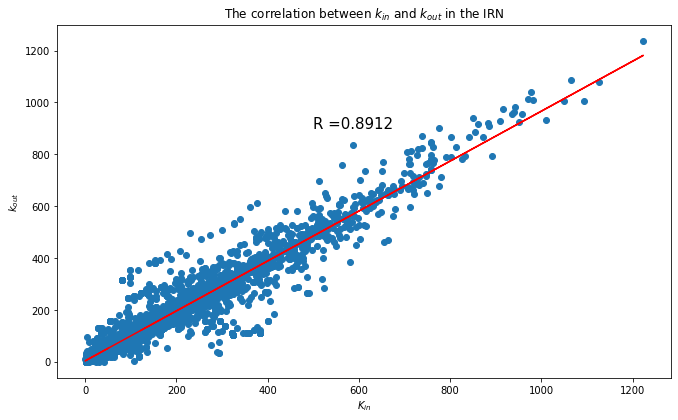

In [ ]:
indegree_sequence = [d for n, d in Railway_Network.in_degree()]
#print("Indegree Distribution", Railway_Network.in_degree())
indegreeCount = collections.Counter(indegree_sequence)


outdegree_sequence = [d for n, d in Railway_Network.out_degree()]
#print("Outdegree Distribution", Railway_Network.out_degree())
outdegreeCount = collections.Counter(outdegree_sequence)

plt.figure(figsize=(11, 6.5))
plt.scatter(indegree_sequence, outdegree_sequence)
plt.xlabel("$\it{K_{in}}$")
plt.ylabel("$\it{k_{out}}$")
plt.text(500, 900, "R =" + str(round(nx.reciprocity(Railway_Network), 4)), fontsize=15)

m, b = np.polyfit(np.array(indegree_sequence), np.array(outdegree_sequence), 1)
plt.plot(np.array(indegree_sequence), m*np.array(indegree_sequence) + b, color = 'r')
plt.title("The correlation between ${k_{in}}$ and ${k_{out}}$ in the IRN")

plt.show()

### Undirected Railway Network

The network has been later converted to an **undirected**, **weighted** network containing **8147 vertices** and **500412 edges**.

In [ ]:
Railway_Network_Undirected = Railway_Network.to_undirected()
print(nx.info(Railway_Network_Undirected))

Name: 
Type: Graph
Number of nodes: 8147
Number of edges: 500412
Average degree: 122.8457


A connected component of an undirected graph is a maximal set of nodes such that each pair of nodes is connected by a path. The number of connected componenets in the above formed undirected network are 7.

In [ ]:
print('Num connected components:', nx.number_connected_components(Railway_Network_Undirected))

Num connected components: 7


### Average Degree of the Railway Network

* The Degree of a node in an undirected graph represents the number of edges connected to the node. The average degree of the network is calculated by finding the sum of degree of each node divided by the number of nodes in the graph.

*  For finding the weighted degree of the node, we find the weighted sum of the edges adjacent to the given node, which is used for calculating the weighted average degree of the network.

In [ ]:
def Calculate_Network_Degree(Railway_Network_Undirected):

    node_degree_values = Railway_Network_Undirected.degree()
    weighted_node_degree_values = Railway_Network_Undirected.degree(weight='weight')

    degree_values = [val for (node, val) in node_degree_values]
    weighted_degree_values = [val for (node, val) in weighted_node_degree_values]

    average_degree = np.sum(degree_values)/ len(degree_values)
    weighted_average_degree = np.sum(weighted_degree_values)/ len(weighted_degree_values)

    return average_degree, weighted_average_degree, node_degree_values, weighted_node_degree_values

In [ ]:
average_degree, weighted_average_degree, node_degree_values, weighted_node_degree_values= Calculate_Network_Degree(Railway_Network_Undirected)

print("The Average Degree of the Indian Railway Network: ", average_degree)
print("\nThe Weighted Average Degree of the Indian Railway Network: ", weighted_average_degree)

The Average Degree of the Indian Railway Network:  122.84571007732907

The Weighted Average Degree of the Indian Railway Network:  1513.2014238369952


### Reflecting on the Connectivity of Nodes in the Railway Network

In [ ]:
print("The 4 stations having the highest degree (that are directly accessible the most) by different stations in the Indian Railway Network are:")
highest_degree = sorted(Railway_Network_Undirected.degree, key=lambda x: x[1], reverse=True)[:4]
highest_degree_nodes = [x for (x, y) in highest_degree]
highest_degree_values = [y for (x, y) in highest_degree]

for k in range(len(highest_degree_nodes)):
    highest_degree_node = highest_degree_nodes[k]
    highest_degree_station = modified_railway_data.loc[modified_railway_data['Station Code'] == highest_degree_node, 'Station Name'].iloc[0]
    print(highest_degree_station,  highest_degree_values[k])


print("\n\nThe 4 stations having highest degree (that are directly accessible the most) in the Indian Railway Network considering weighted degree distribution are:")
highest_weighted_degree = sorted(Railway_Network_Undirected.degree(weight='weight'), key=lambda x: x[1], reverse=True)[:4]
highest_weighted_degree_nodes = [x for (x, y) in highest_weighted_degree]
highest_weighted_degree_values = [y for (x, y) in highest_weighted_degree]

for k in range(len(highest_weighted_degree_nodes)):
    highest_weighted_degree_node = highest_weighted_degree_nodes[k]
    highest_weighted_degree_station = modified_railway_data.loc[modified_railway_data['Station Code'] == highest_weighted_degree_node, 'Station Name'].iloc[0]
    print(highest_weighted_degree_station,  highest_weighted_degree_values[k])

The 4 stations having the highest degree (that are directly accessible the most) by different stations in the Indian Railway Network are:
HOWRAH JN. 1284
VIJAYWADA JN 1171
VARANASI JN. 1124
KANPUR CENTR 1119


The 4 stations having highest degree (that are directly accessible the most) in the Indian Railway Network considering weighted degree distribution are:
CHENNAI BEAC 289635
TAMBARAM 231587
PALLAVARAM 195255
ST. THOMAS M 194981


### Degree Distribution of the Railway Network

By counting how many nodes have a particular degree we find the degree distribution of the network P(k) which is defined as the fraction of nodes in the graph with degree k. We use the weighted degree to find the weighted degree distribution of the Network.

In [ ]:
def Calculate_Degree_Distribution(Railway_Network_Undirected):

    degree_sequence = sorted([d for n, d in Railway_Network_Undirected.degree()])
    degreeCount = collections.Counter(degree_sequence)

    degree, count = zip(*degreeCount.items())

    plt.figure(figsize=(11, 6))
    plt.scatter(degree, count)

    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Degree\ Distribution\ (P_k)}$")

    plt.title("Degree Distribution of the IRN")

    plt.show()

###Plotting the Degree Distibution of the Railway Network ($P_{K}$ X K)

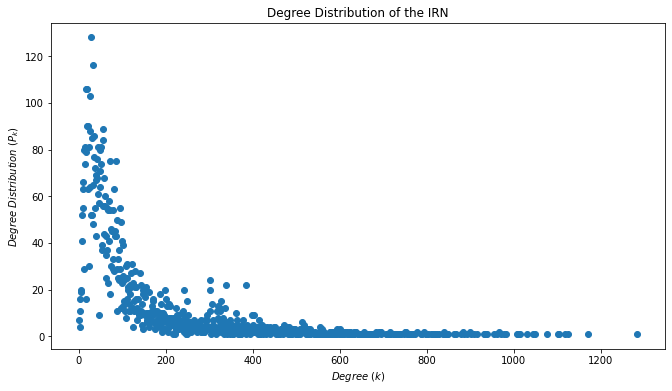

In [ ]:
Calculate_Degree_Distribution(Railway_Network_Undirected)

In [ ]:
def Calculate_Cumulative_Degree_Distribution(Railway_Network_Undirected):

    degree_sequence = sorted([d for n, d in Railway_Network_Undirected.degree()])
    degreeCount = collections.Counter(degree_sequence)

    degree, count = zip(*degreeCount.items())

    cumulative_count = np.cumsum(count[::-1])[::-1] 

    plt.figure(figsize=(11, 6))
    plt.scatter(degree, cumulative_count)

    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Cumulative\ Degree\ Distribution\  (P_k)}$")

    m, b = np.polyfit(np.array(degree), np.array(cumulative_count), 1)
    plt.plot(np.array(degree), m*np.array(degree) + b, color = 'r')

    plt.title("Cumulative Degree Distribution of the IRN")

    plt.show()

###Plotting the Cumulative Degree Distibution of the Railway Network ($P_{K}$ X K)

The cumulative degree distribution shows the exponentially decaying nature of the degree distribution for the IRN.

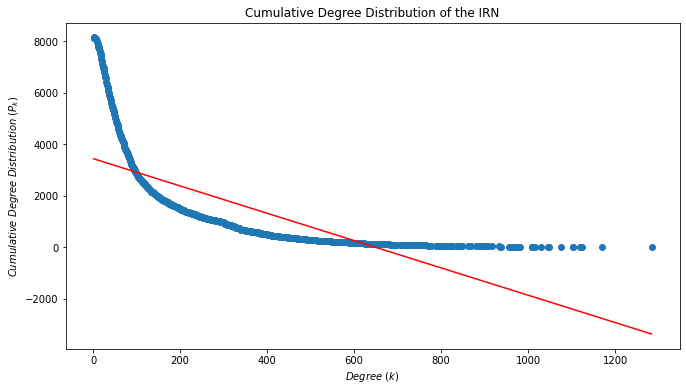

In [ ]:
Calculate_Cumulative_Degree_Distribution(Railway_Network_Undirected)

###Plotting the Cumulative Strength Distibution of the Railway Network ($P_{S}$ X K)

The strength, or weighted degree, of a node in a weighted network is defined as the total weight of the edges adjacent to the node.

In this network representation, the strength of a node represents the total number of different journeys that can be undertaken from
that station by a different train-route and hence, it is a measure of the available transportation from a station, which combines both the notions of connectivity and amount of traffic-flow.

In [ ]:
def Calculate_Cumulative_Strength_Distribution(Railway_Network_Undirected):

    degree_sequence = sorted([d for n, d in Railway_Network_Undirected.degree(weight = 'weight')])
    degreeCount = collections.Counter(degree_sequence)

    degree, count = zip(*degreeCount.items())

    cumulative_count = np.cumsum(count[::-1])[::-1] 

    plt.figure(figsize=(11, 6))
    plt.scatter(degree, cumulative_count)

    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Cumulative\ Strength\ Distribution\  (P_k)}$")

    m, b = np.polyfit(np.array(degree), np.array(cumulative_count), 1)
    plt.plot(np.array(degree), m*np.array(degree) + b, color = 'r')

    plt.title("Cumulative Degree Distribution of the IRN")

    plt.show()

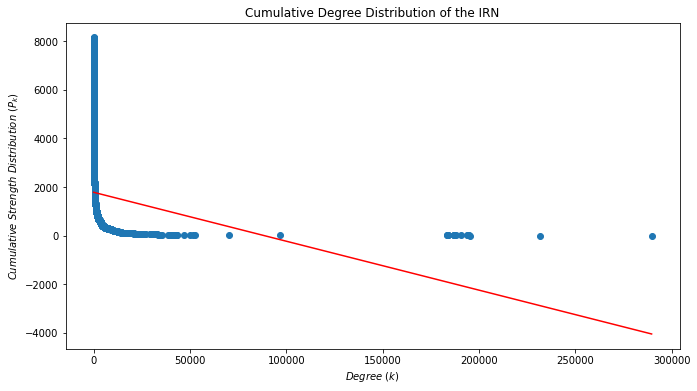

In [ ]:
Calculate_Cumulative_Strength_Distribution(Railway_Network_Undirected)

###Clustering Coefficient

* The Clustering Coefficient of the network is the measure of the degree to which nodes in a graph tend to cluster together. It is defied as : (2 *  Li )/ [ Ki  * ( Ki  - 1)], where  Li  represents the number of links between the  ki  neighbors of node i.

* The average clustering coefficient is the clustering coefficient averaged over all the vertices of the graph.

In [ ]:
Clustering_Coefficient = nx.average_clustering(Railway_Network_Undirected)
print("The Clustering Coefficent of the Graph: ", Clustering_Coefficient)

The Clustering Coefficent of the Graph:  0.7635363552259165


In [ ]:
def Calculate_Clustering_Coefficient(Railway_Network_Undirected):

    node_clustering_values = nx.clustering(Railway_Network_Undirected)

    node_degree_values = Railway_Network_Undirected.degree()
    unique_degrees = list(set([y for (x,y) in node_degree_values]))

    Degree_Clustering = {}

    for degree in unique_degrees:
        nodes_kdegree = [x for (x, y) in node_degree_values if y == degree]
        count_nodes_kdegree = len(nodes_kdegree)

        clustering_sum  = 0
        for node in nodes_kdegree:
            clustering_sum = clustering_sum + node_clustering_values[node]
        
        average_clustering = clustering_sum / count_nodes_kdegree
        Degree_Clustering[degree] = average_clustering

    return Degree_Clustering

In [ ]:
Degree_Clustering = Calculate_Clustering_Coefficient(Railway_Network_Undirected)

We find that the low-degree nodes always have higher clustering coefficients and that the high-degree nodes have the opposite tendency. Because the low-degree cities are not fully connected in IRN while the connections between the high- degree cities are dense, high-degree cities always have a low clustering coefficient.

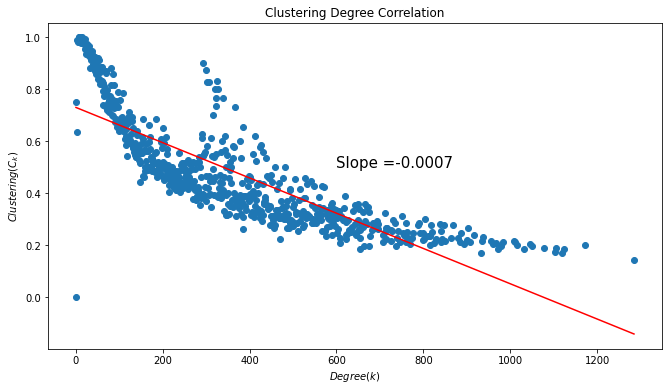

In [ ]:
Degree_Values_C = (list(Degree_Clustering.keys()))
Degree_Clustering_Values = (list(Degree_Clustering.values()))

plt.figure(figsize=(11, 6))
plt.scatter(Degree_Values_C, Degree_Clustering_Values)

plt.xlabel("$\it{Degree (k)}$")  
plt.ylabel("$\it{Clustering (C_k)}$")

m, b = np.polyfit(np.array(Degree_Values_C), np.array(Degree_Clustering_Values), 1)
plt.plot(np.array(Degree_Values_C), m*np.array(Degree_Values_C) + b, color = 'r')

plt.text(600, 0.5, "Slope =" + str(round(m, 4)), fontsize=15)

plt.title("Clustering Degree Correlation")

plt.show()

### Analyzing the Path Length of the Railway Network

The path length is defined as the shortest distance between two nodes. The average path length is the average of the path length averaged over all pairs of nodes.

In [ ]:
def analyze_path_length(Railway_Network_Undirected):

    shortest_path_lengths = list(nx.shortest_path_length(Railway_Network_Undirected))
    Path_Lengths = {}
    
    for node_path_lengths in shortest_path_lengths:
  
        source_station = node_path_lengths[0]
        destination_stations = node_path_lengths[1]

        for station in destination_stations:
            path = (station, source_station)
            if(path not in Path_Lengths):
                Path_Lengths[(source_station, station)] =  destination_stations[station]
    
    return Path_Lengths

In [ ]:
Path_Lengths = analyze_path_length(Railway_Network_Undirected)

### Path Length Distribution of the Railway Network

By counting how many node pairs (source station and destination station) have a particular path length we find the path length distribution of the network.

In [ ]:
def Calculate_Path_Length_Distribution(Path_Lengths):

    path_length_sequence = Path_Lengths.values()
    path_lengthCount = collections.Counter(path_length_sequence)

    path_length, count = zip(*path_lengthCount.items())

    return path_length, count

In [ ]:
shortest_path_lengths, shortest_path_length_values = Calculate_Path_Length_Distribution(Path_Lengths)
path_length_distribution = {shortest_path_lengths[i]: shortest_path_length_values[i] for i in range(len(shortest_path_lengths))}

{0: 8147, 1: 495316, 2: 7114945, 3: 21252418, 4: 3044950, 5: 394421, 6: 154422, 7: 13244, 8: 583, 9: 186, 10: 18} 



Text(0.5, 1.0, 'Logplot of Path Length Distribution')

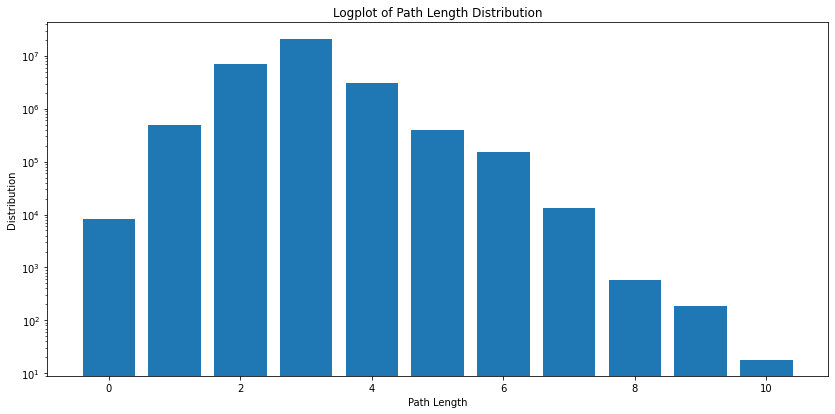

In [ ]:
print(path_length_distribution, "\n")

plt.figure(figsize=(14, 6.5))
plt.bar(path_length_distribution.keys(), path_length_distribution.values())
plt.xlabel("Path Length")
plt.ylabel("Distribution")
plt.yscale('log')

plt.title("Logplot of Path Length Distribution")

The above graph infers that most of the node pairs are connected having the shortest path length as 3. The stations are connected with each other maximally at a distance of 10 and nymber of node pairs doind so are 18.

In [ ]:
average_path_length_sum = 0
Diameter = []
Path_Length = []
count = 0
for C in (Railway_Network_Undirected.subgraph(c).copy() for c in nx.connected_components(Railway_Network_Undirected)):
    if(nx.average_shortest_path_length(C) > 0):
      count = count + 1
      average_path_length_sum = average_path_length_sum + nx.average_shortest_path_length(C)
    Diameter.append(nx.diameter(C))
    Path_Length.append(nx.average_shortest_path_length(C))

In [ ]:
average_path_length = average_path_length_sum / count
average_diameter = np.sum(Diameter) / count

print("The average path length of Indain Railway Network: ", average_path_length)
print("The Diameter of the Indian Railway Network: ",average_degree)

The average path length of Indain Railway Network:  1.3796888795757478
The Diameter of the Indian Railway Network:  122.84571007732907


### Analyzing Small World Properties

In [ ]:
Barabasi_Albert_Graph = nx.barabasi_albert_graph(8147, 30)

Barabasi_Clustering_Coefficient = nx.average_clustering(Barabasi_Albert_Graph)
print("The Clustering Coefficent of the Barabasi Albert Model: ", Barabasi_Clustering_Coefficient)

Barabasi_Path_Length = nx.average_shortest_path_length(Barabasi_Albert_Graph)
print("The Average Path Length of the Barabasi Albert Model: ", Barabasi_Path_Length)

The Clustering Coefficent of the Barabasi Albert Model:  0.02784126031297327
The Average Path Length of the Barabasi Albert Model:  2.5293800260141337


Comparing with the Barabasi Albert Model of same size (Clustering Coefficient: 0.02830 and Average Path Length: 2.5275), the Indian Railway Network has a high clustering coefficient (0.61295) and short average path length (1.4792), thus can be regarded as a **small-world network**

###Degree Correlation

The degree correlation k nn ( k ) is the average degree of neighbors of all nodes with degree k . It measures the relationship between degrees of nodes at the ends of an edge

In [ ]:
def Calculate_Degree_Correlation(Railway_Network_Undirected):

    node_degree_values = Railway_Network_Undirected.degree()
    unique_degrees = list(set([y for (x,y) in node_degree_values]))
    Degree_Correlation = {}

    for degree in unique_degrees:

        nodes_kdegree = [x for (x, y) in node_degree_values if y == degree]
        count_nodes_kdegree = len(nodes_kdegree)

        final_degree_sum = 0

        for node in nodes_kdegree:

            Neighbours = []

            for n in Railway_Network_Undirected.neighbors(node):
              Neighbours.append(n)
            
            degree_sum = 0
            for neighbour in Neighbours:
                degree_sum = degree_sum + Railway_Network_Undirected.degree[neighbour]

            if(len(Neighbours) > 0):
                node_average_degree = degree_sum / len(Neighbours)
            else:
                node_average_degree = 0
            
        final_degree_sum = final_degree_sum + node_average_degree

        correlation = final_degree_sum / count_nodes_kdegree
        #print(correlation)
        
        Degree_Correlation[degree] = correlation

    return Degree_Correlation

In [ ]:
Degree_Correlation = Calculate_Degree_Correlation(Railway_Network_Undirected)

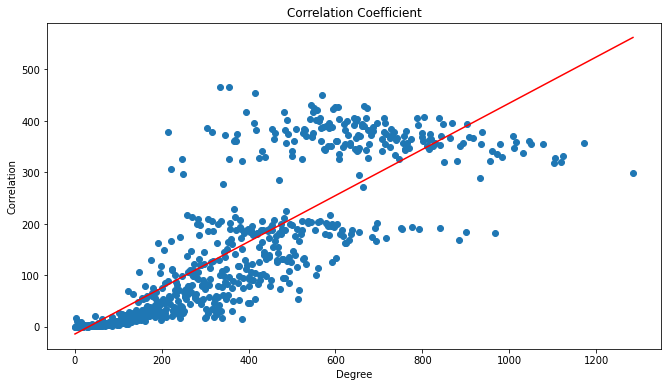

In [ ]:
Degree_Values = (list(Degree_Correlation.keys()))
Degree_Correlation_Values = (list(Degree_Correlation.values()))

plt.figure(figsize=(11, 6))

plt.scatter(Degree_Values, Degree_Correlation_Values)

plt.xlabel("Degree")  
plt.ylabel("Correlation")

m, b = np.polyfit(np.array(Degree_Values), np.array(Degree_Correlation_Values), 1)
plt.plot(np.array(Degree_Values), m*np.array(Degree_Values) + b, color = 'r')

plt.title("Correlation Coefficient")

plt.show()

###Assortativity Coefficient

The assortativity coefficient represents the extent to which nodes in a complex network are associated with other nodes in the network. A network is said to be assortative when high de- gree nodes are, on average, connected to other nodes with a high degree and low degree nodes are, on average, connected to other nodes with a low degree.

In [ ]:
assortativity_coefficient = nx.degree_pearson_correlation_coefficient(Railway_Network)
print("The Assotativity Coefficient of the Indian Railway Network: ", assortativity_coefficient)

The Assotativity Coefficient of the Indian Railway Network:  0.24250767571456888
